In [23]:
%pylab inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

Populating the interactive namespace from numpy and matplotlib


In [25]:
def load_data(train=True):
    transform = transforms.Compose([transforms.ToTensor()])
    trainset = datasets.MNIST('../data', train=train, download=True, transform=transform)

    X = trainset.data
    y = trainset.targets

    # Normalize data
    X = X / 255.0
    loader = DataLoader(TensorDataset(X.reshape(X.shape[0],1,X.shape[1],X.shape[2]),y), batch_size=64, shuffle=True)
    return loader

In [6]:
train_loader = load_data()

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [8]:
def train(epoch, model, optimizer, train_loader):
    model.train()
    train_losses = []
    train_counter = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    return model, train_losses, train_counter

In [13]:
model = Net()
adam = optim.Adam(model.parameters())

In [24]:
model, losses, counter = train(1, model, adam, train_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.312200
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.239747
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.422470
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.254286
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.339576
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.241256
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.248747
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.388470
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.291923
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.527306
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.335168
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.291574
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.283862
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.271431
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.085578
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.208617
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.410543
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.155184
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.444121
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.262168
Train Epoch: 1 [12800/60000 (

In [19]:
model.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [27]:
test_set = load_data(train=False)

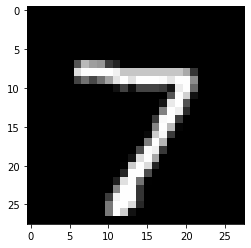

In [31]:
imshow(test_set.dataset[0][0].reshape(28,28,1)*255,cmap='gray')

In [33]:
model(test_set.dataset[0][0].reshape(1,1,28,28)).argmax()

tensor(7)